Installing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing CSV File

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df.shape

(11251, 15)

Checking the top 5 records of dataset

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


Use df.info() to get the info about the dataframe df.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Drop unrelated/blank columns

In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

Check the dataframe after deleting the two null columns

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


Use pd.isnull(NameOfDataframe):
It provides true/false value for each element in the dataset

In [8]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


Now calculate the total number of null values for each column

In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Now we can either delete the null values using df.dropna(inplace=True)
OR
We can replace the null values with the mean of amount of all the rows, using df.fillna(df['Amount'].mean(), inplace=True)

In [10]:
df.fillna(df['Amount'].mean(), inplace=True)

Now again check the total number of null rows per column

In [11]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

As we can see that we have replaced all the null values in the amount column by the mean of the same column.

df.describe() is used to show mathematical stats about the columns of type int/float

In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


Now, lets visualizes the data using seaborn and matplotlib

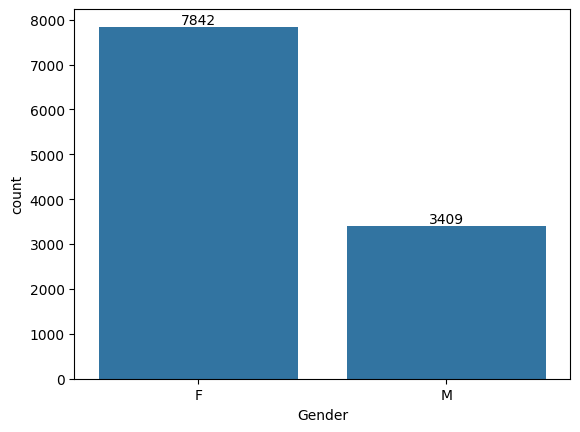

In [23]:
ax = sns.countplot(x = 'Gender', data = df)
## We can also show the data labels on it
for bar in ax.containers:
    ax.bar_label(bar)


<Axes: xlabel='Gender', ylabel='Amount'>

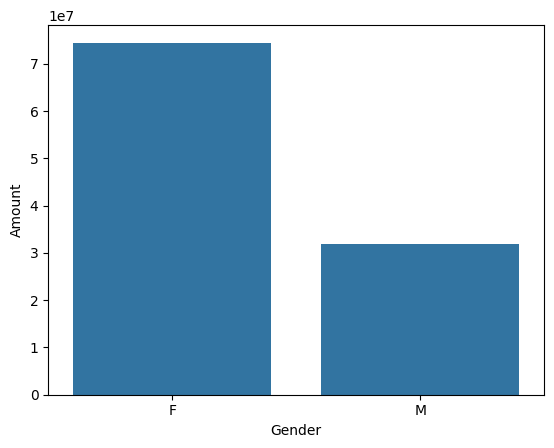

In [24]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_gen)

From above graphs we can say that most of the buyers are female and they spend more money.

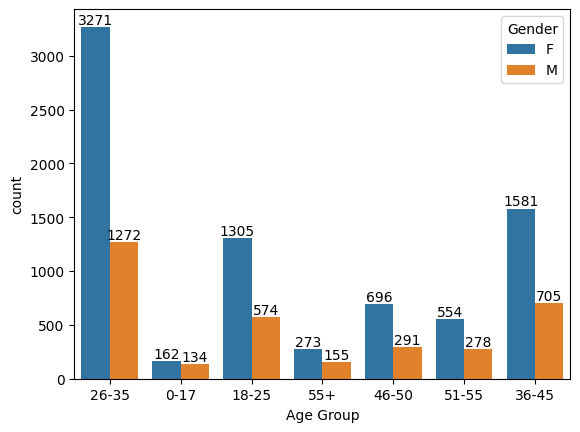

In [25]:
## Plotting chart for age group
ax = sns.countplot(data = df, x='Age Group', hue='Gender')
for bar in ax.containers:
    ax.bar_label(bar)

C:\conda_temp\ipykernel_19884\138826083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Amount', data= sales_by_age_group, palette="viridis")


<Axes: xlabel='Age Group', ylabel='Amount'>

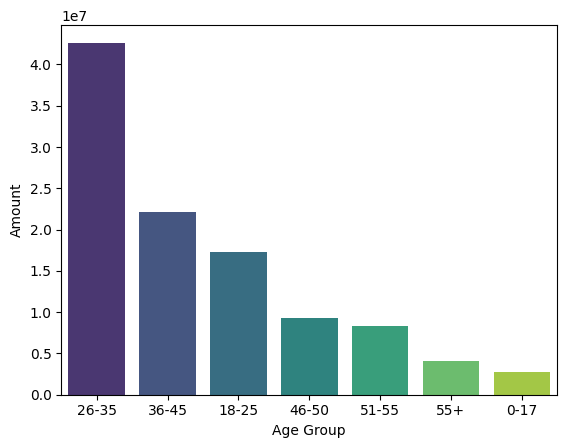

In [37]:
sales_by_age_group = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data= sales_by_age_group, palette="viridis")

From above graphs we can say that most of the buyers are of age group between 26-35 yrs female

Now, lets plot some charts based on state

C:\conda_temp\ipykernel_19884\1187117518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orders', y='State', data= sales_by_state, palette='viridis')


<Axes: xlabel='Orders', ylabel='State'>

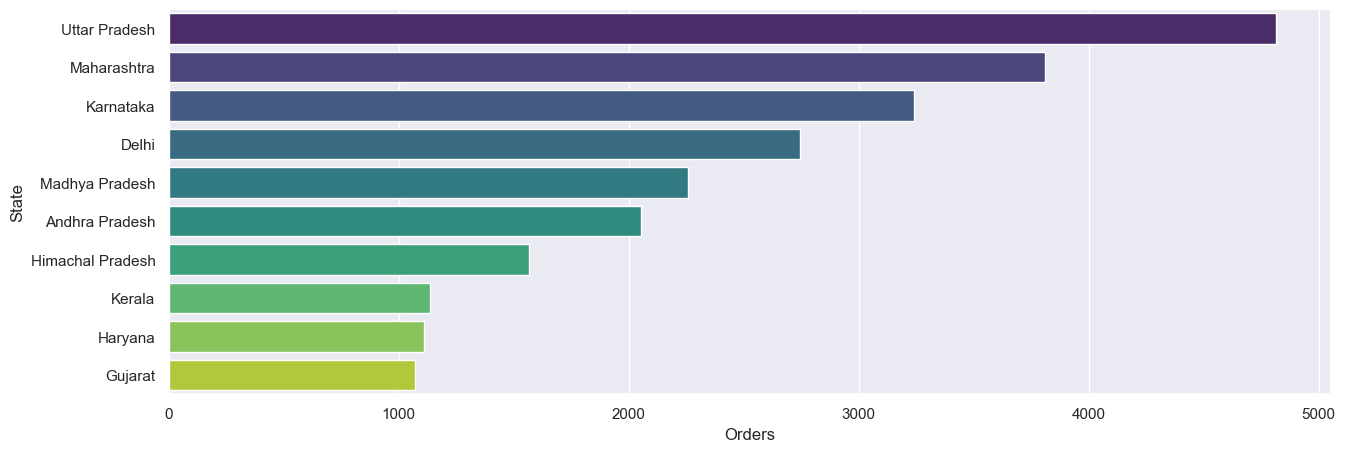

In [43]:
## Total Number of orders from the top 10 states
sales_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.barplot(x='Orders', y='State', data= sales_by_state, palette='viridis')

We used a vertical bar chart/column chart so that names of states wont overlap with each other, or else we can use bar chart by passing some extra parameters

<Axes: xlabel='State', ylabel='Amount'>

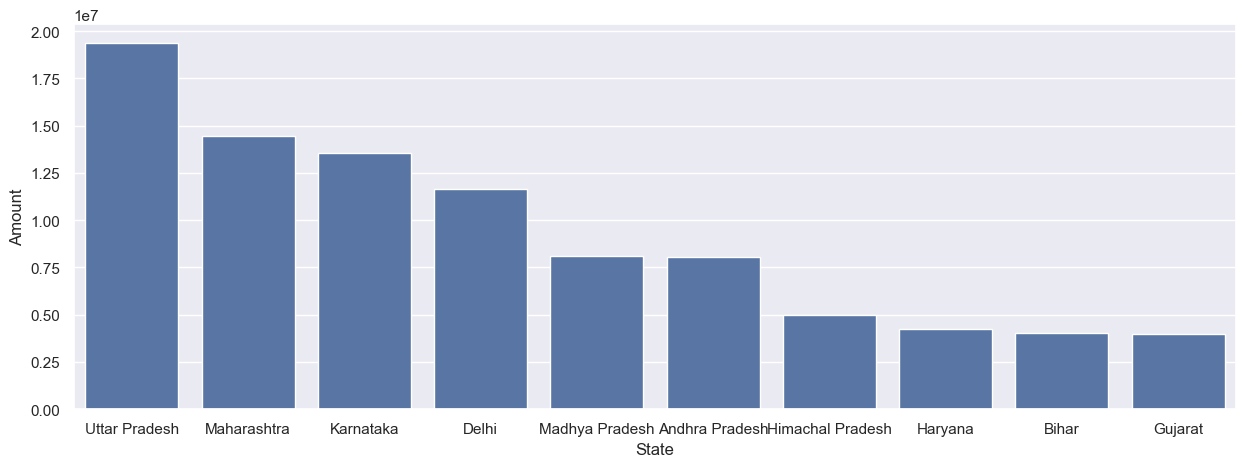

In [47]:
total_amount_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State', y='Amount', data=total_amount_by_state)

From the above graphs we can conclude that most of the orders and total sales/amount are from Uttar Pradesh, Maharashtra, and Karnataka respectively.

Lets plot some graphs for marital status

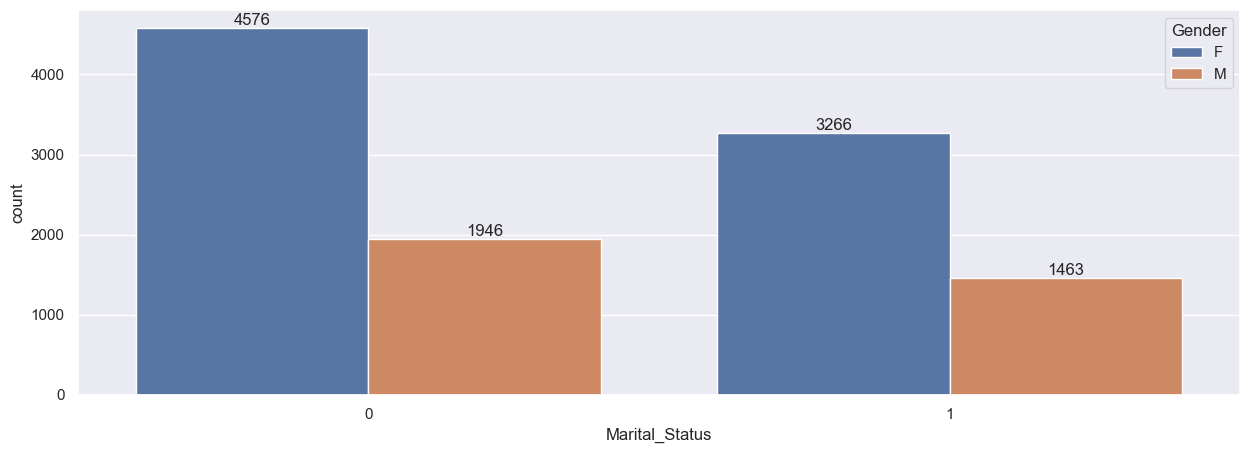

In [49]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

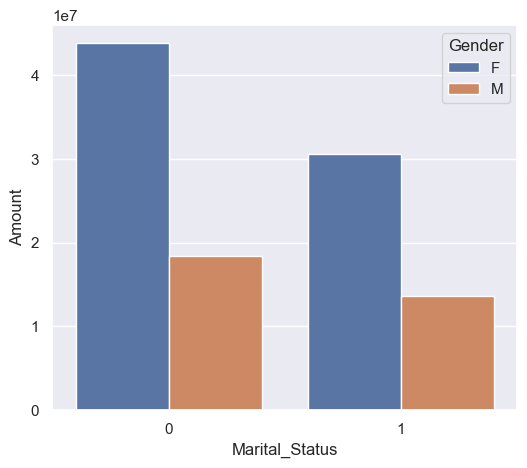

In [50]:
sales_by_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6,5)})
sns.barplot(data=sales_by_marital_status, x='Marital_Status', y="Amount", hue='Gender')

From the above graphs we can say that married woman has spend the most amount

Lets plot some charts based on Occupation

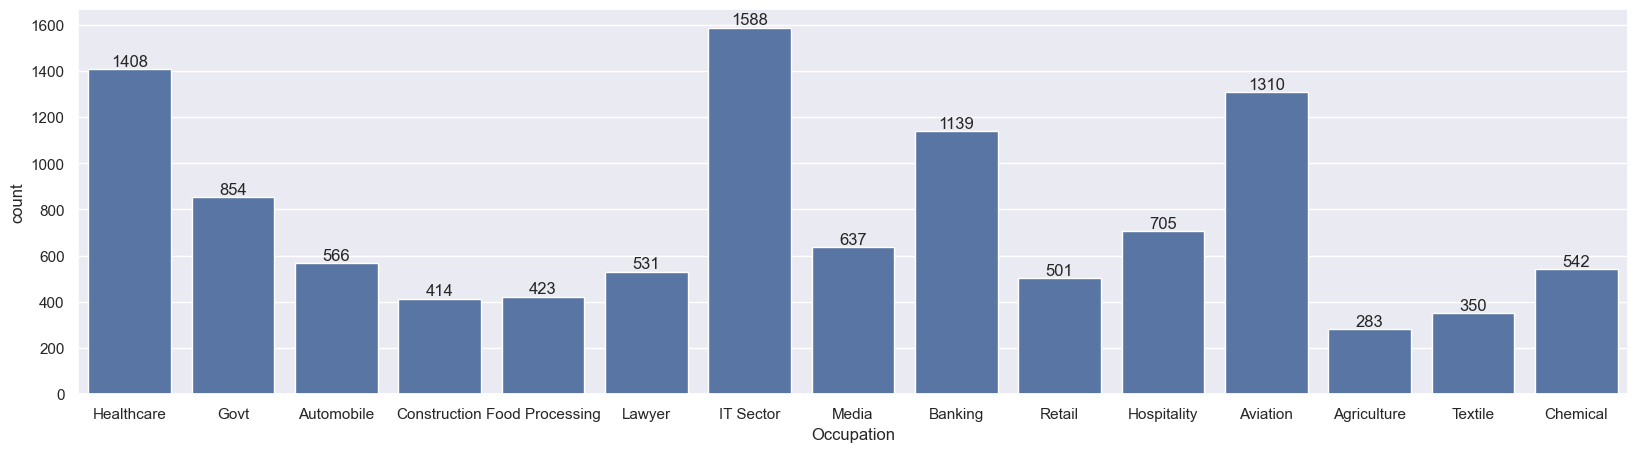

In [51]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=df, x='Occupation')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

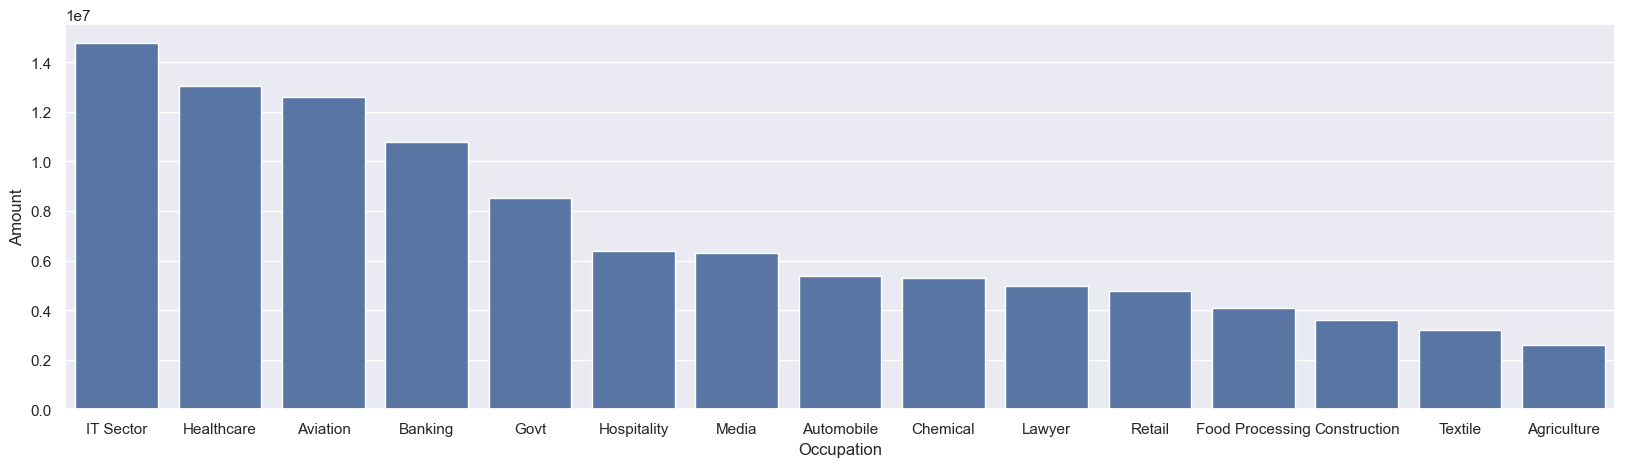

In [52]:
sales_by_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_by_occupation, x='Occupation', y='Amount')


From above graphs we can say that most of the buyers are working in IT, Healthcare and Aviation Sector.

Now lets plot some graphs based on Product Category

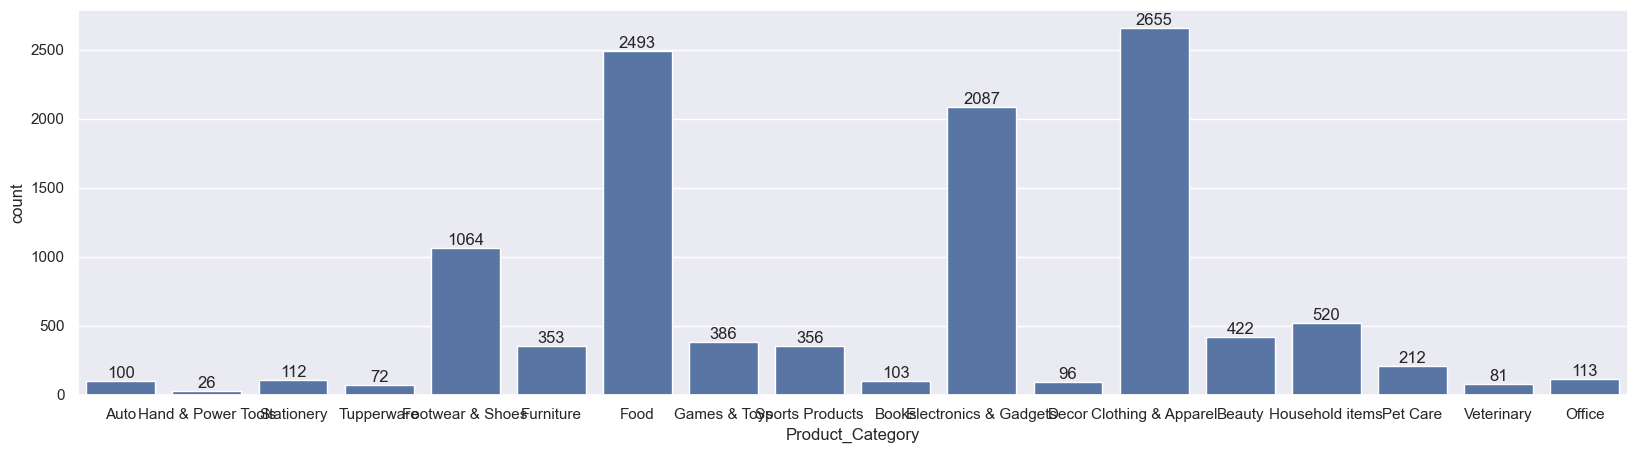

In [53]:
sns.set(rc={'figure.figsize':(20,5)})
ax= sns.countplot(data=df, x='Product_Category')

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

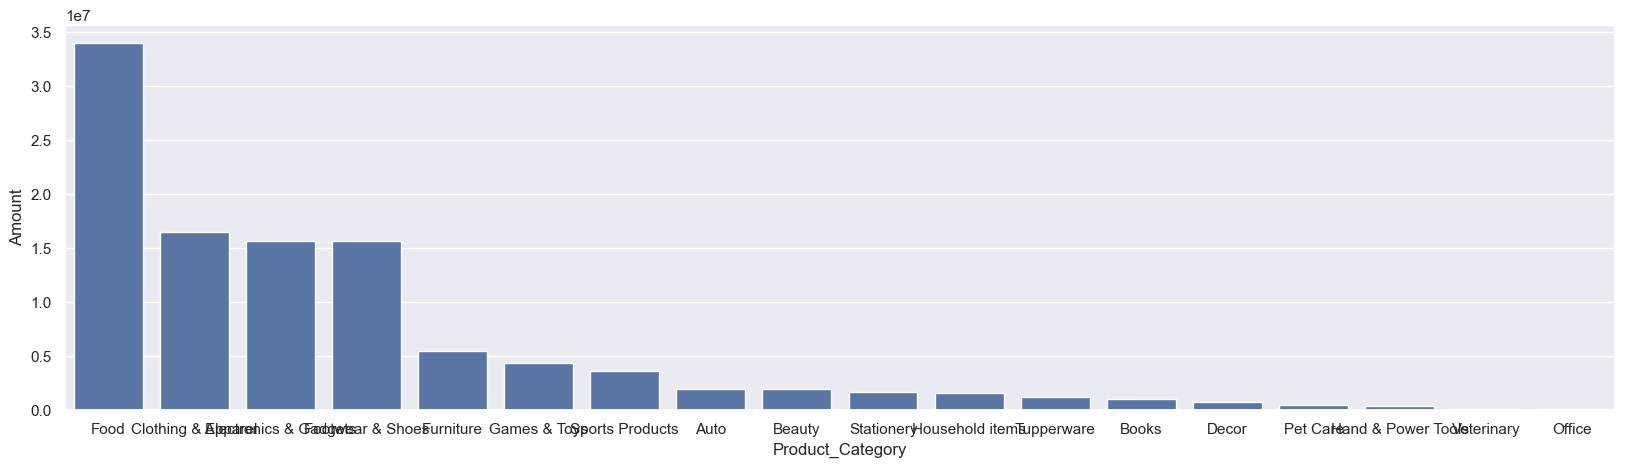

In [54]:
sales_by_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_by_product_category, x='Product_Category', y='Amount')

From the above graphs we can say that most of the sold products are from Food, Clothing and Electronics category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

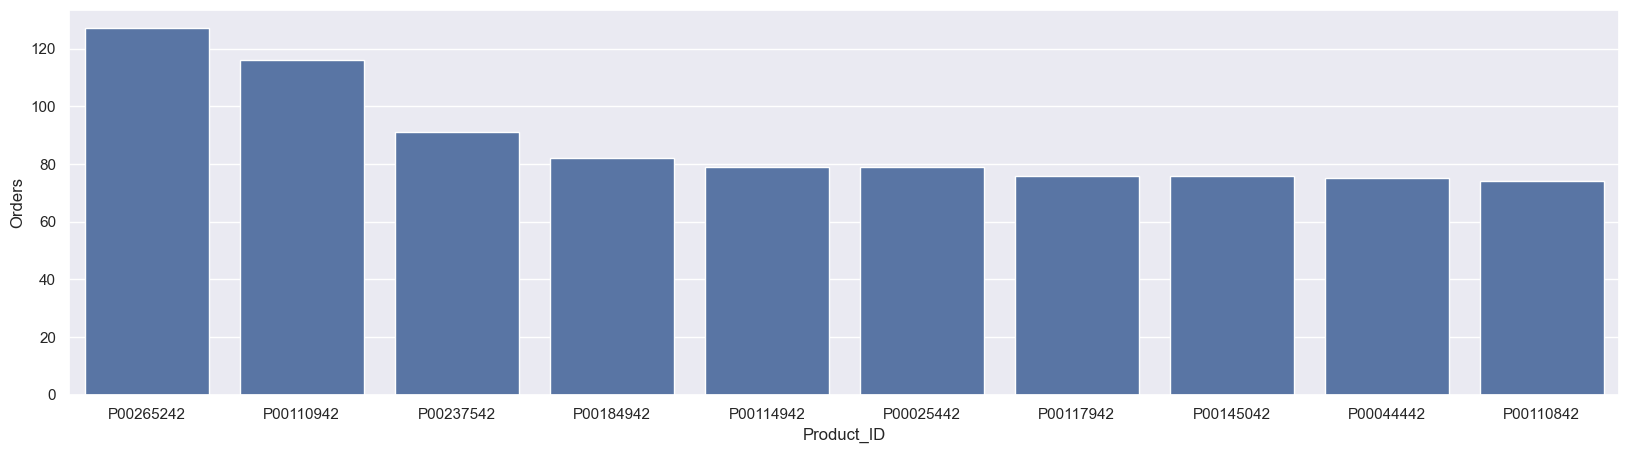

In [60]:
sales_by_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_by_product, x='Product_ID', y='Orders')

### CONCLUSION
Married women of age group 26-35 years from UP, Maharashtra and Karnataka working in iT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.